## Data Dimensionality

Nr. Records =  286
First timestamp 2015-01-05 00:00:00
Last timestamp 2020-09-07 00:00:00


(array([735234., 735599., 735964., 736330., 736695., 737060., 737425.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

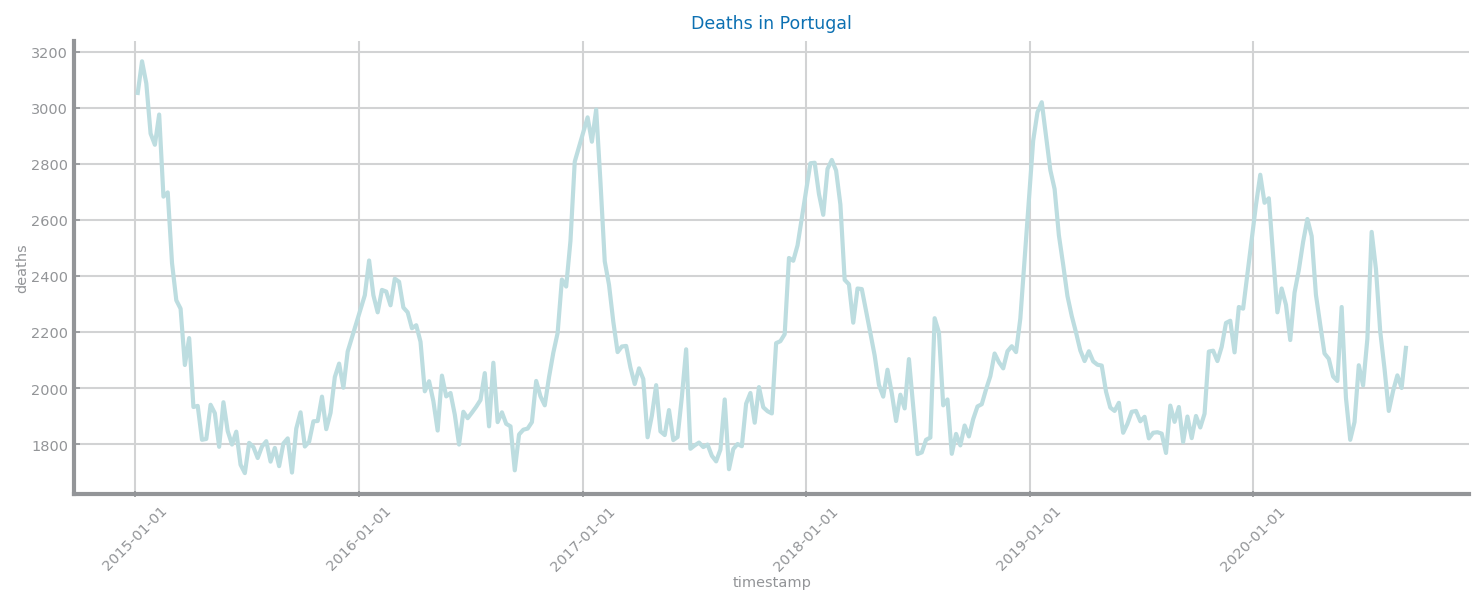

In [1]:
import sys
sys.path.insert(1, '../utils')

import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
import ts_functions as ts
import scipy.stats as _stats
import numpy as np

data = pd.read_csv('deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)
data = data.sort_values('start_date')

print("Nr. Records = ", data.shape[0])
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.4f,%.4f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.4f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # Uniform
    loc_u, scale_u = _stats.uniform.fit(x_values)
    distributions['Uni(%.4f)'%(1/scale_u)] = _stats.uniform.pdf(x_values, loc_u, scale_u)
    return distributions

#values = data.sort_values('start_date').values
#distributions = compute_known_distributions(values)
#ds.multiple_line_chart(list(data.index), distributions, title='Best fit for deaths', xlabel="date", ylabel="deaths")

ts.plot_series(data, x_label='timestamp', y_label='deaths', title='Deaths in Portugal')
plt.xticks(rotation = 45)

#plt.show()

In [2]:
data

,deaths
start_date,
2015-01-05,3054
2015-01-12,3167
2015-01-19,3088
2015-01-26,2909
2015-02-02,2869
...,...
2020-08-10,1919
2020-08-17,1990
2020-08-24,2046


## Data Granularity

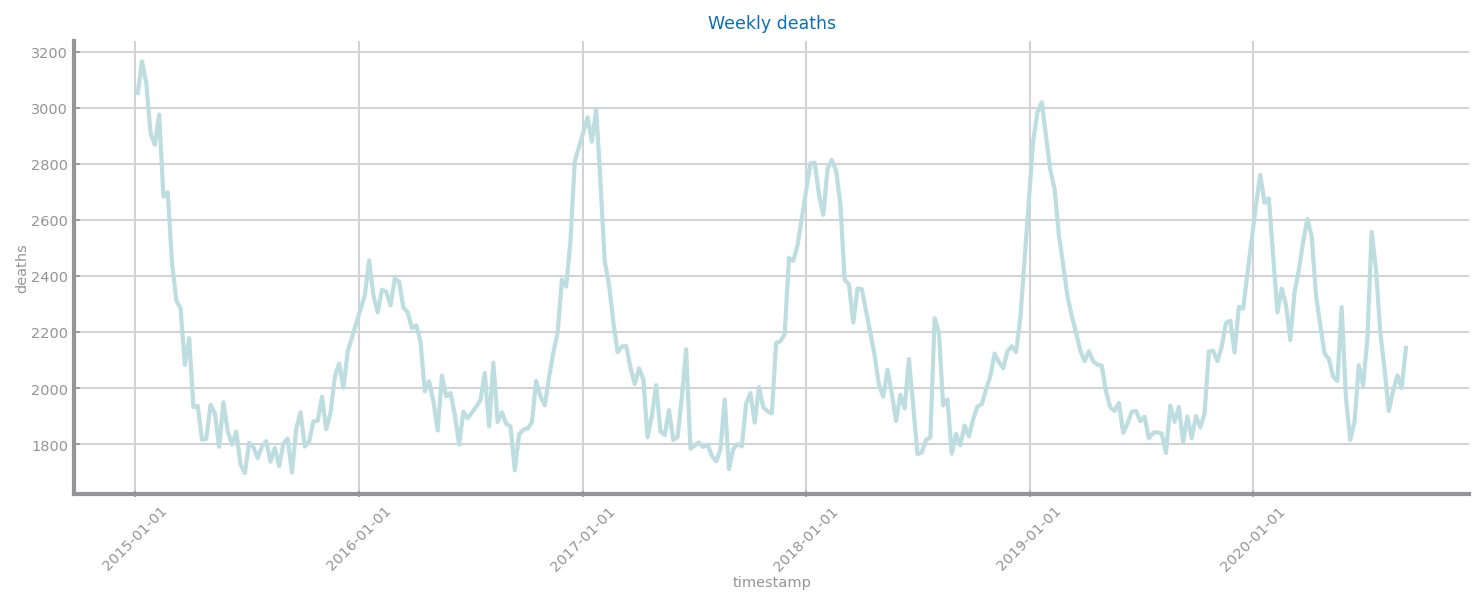

In [3]:
week_df = data.copy().groupby(data.index.date).mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(week_df, title='Weekly deaths', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

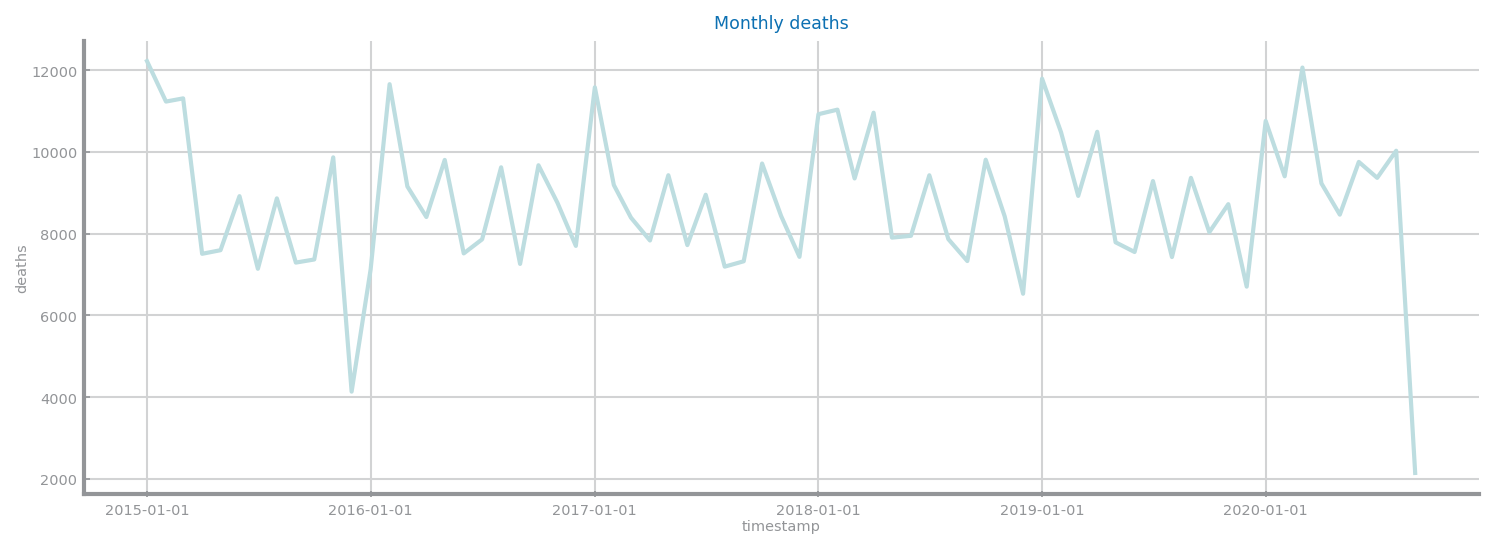

In [4]:
index = data.index.to_period('M')
month_df = data.copy().groupby(index).sum()
month_df['start_date'] = index.drop_duplicates().to_timestamp()
month_df.set_index('start_date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(month_df, title='Monthly deaths', x_label='timestamp', y_label='deaths')
plt.show()

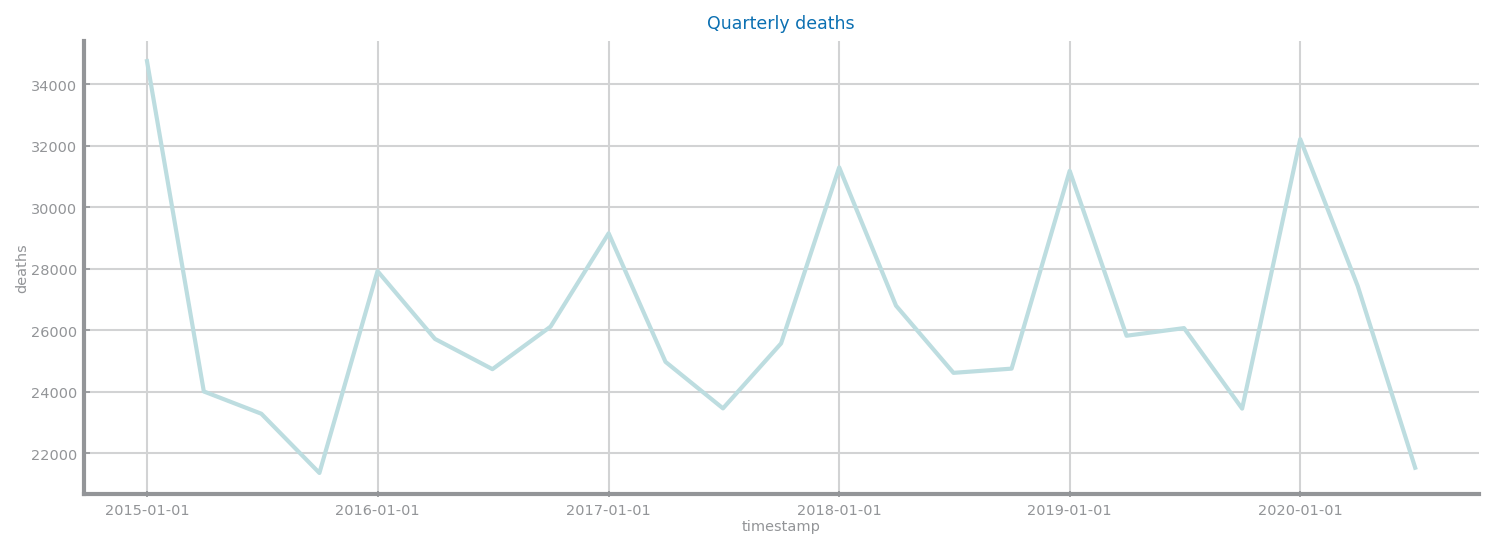

In [5]:
index = data.index.to_period('Q')
quarter_df = data.copy().groupby(index).sum()
quarter_df['start_date'] = index.drop_duplicates().to_timestamp()
quarter_df.set_index('start_date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(quarter_df, title='Quarterly deaths', x_label='timestamp', y_label='deaths')
plt.show()

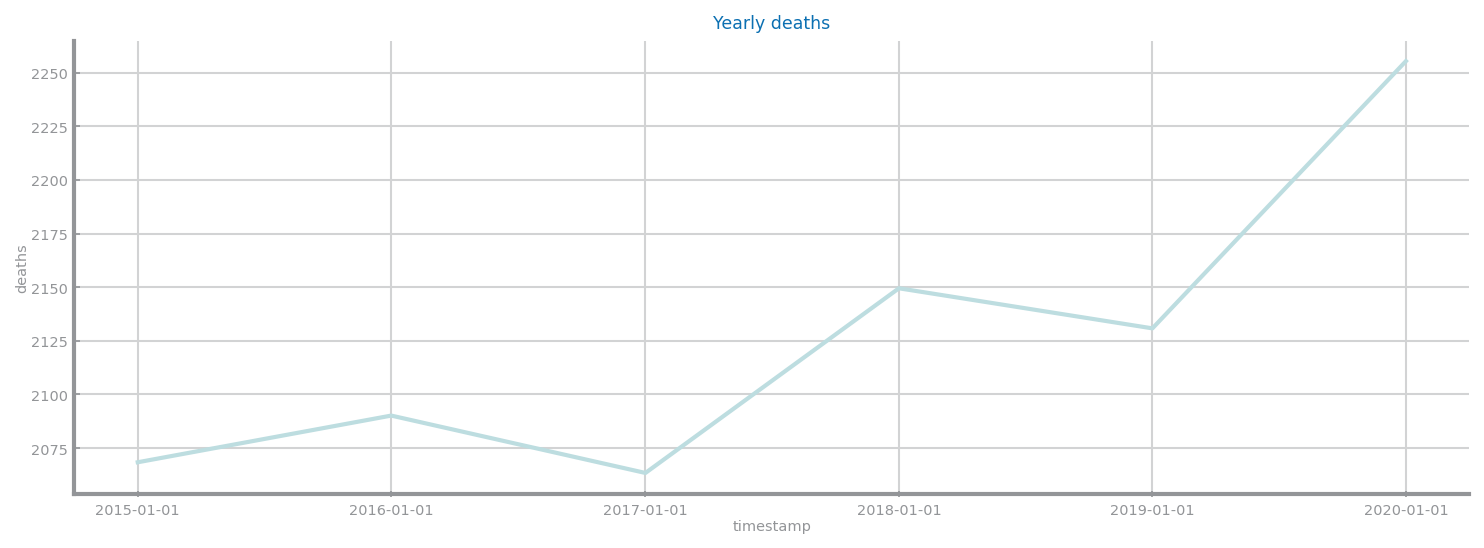

In [6]:
index = data.index.to_period('Y')
quarter_df = data.copy().groupby(index).mean()
quarter_df['start_date'] = index.drop_duplicates().to_timestamp()
quarter_df.set_index('start_date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(quarter_df, title='Yearly deaths', x_label='timestamp', y_label='deaths')
plt.show()

## Data Distribution

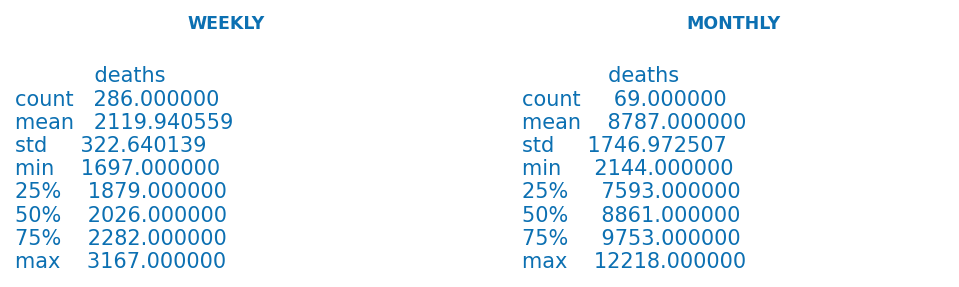

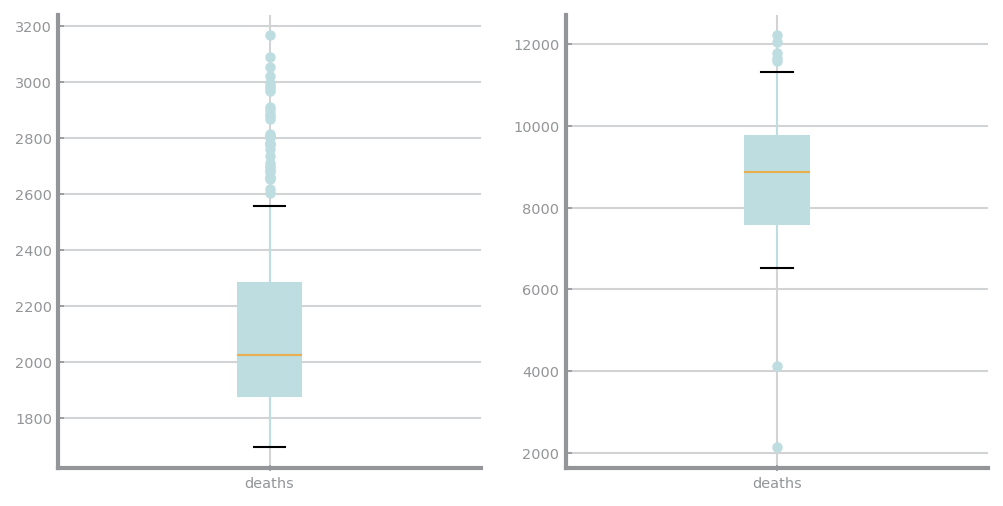

In [7]:
index = data.index.to_period('M')
month_df = data.copy().groupby(index).sum()
month_df['start_date'] = index.drop_duplicates().to_timestamp()
month_df.set_index('start_date', drop=True, inplace=True)
_, axs = plt.subplots(1, 2, figsize=(2*ts.HEIGHT, ts.HEIGHT/2))
axs[0].grid(False)
axs[0].set_axis_off()
axs[0].set_title('WEEKLY', fontweight="bold")
axs[0].text(0, 0, str(data.describe()))
axs[1].grid(False)
axs[1].set_axis_off()
axs[1].set_title('MONTHLY', fontweight="bold")
axs[1].text(0, 0, str(month_df.describe()))
plt.show()

_, axs = plt.subplots(1, 2, figsize=(2*ts.HEIGHT, ts.HEIGHT))
data.boxplot(ax=axs[0])
month_df.boxplot(ax=axs[1])
plt.show()

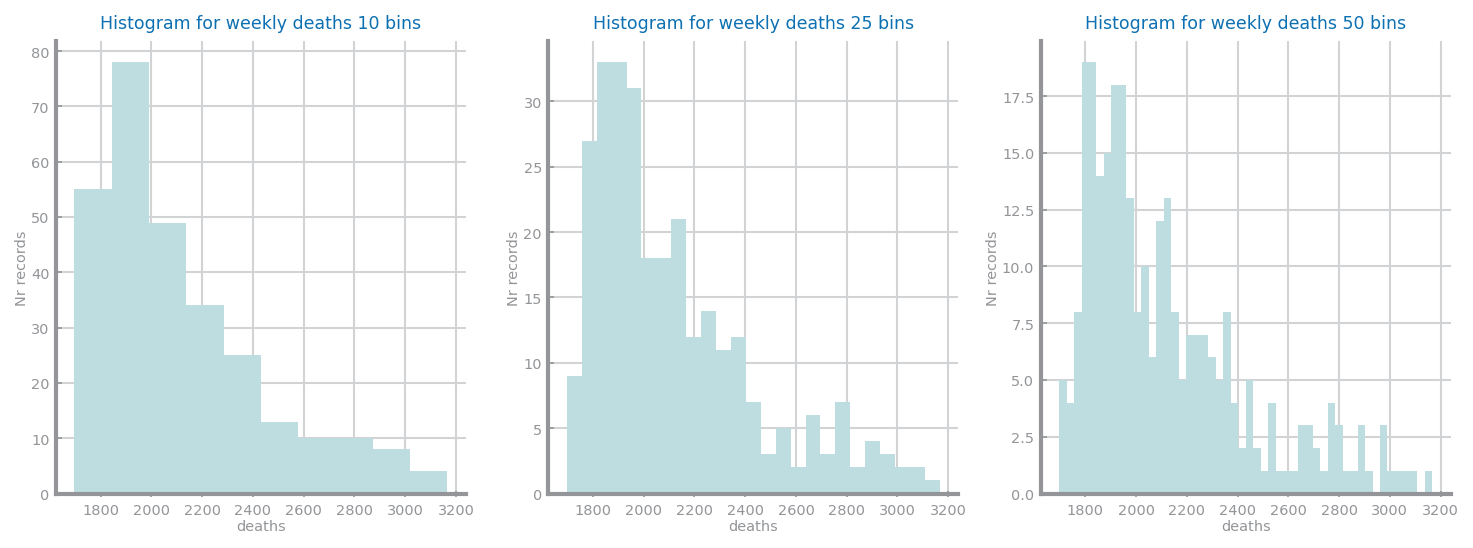

In [8]:
bins = (10, 25, 50)
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for weekly deaths %d bins'%bins[j])
    axs[j].set_xlabel('deaths')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(data.values, bins=bins[j])
plt.show()

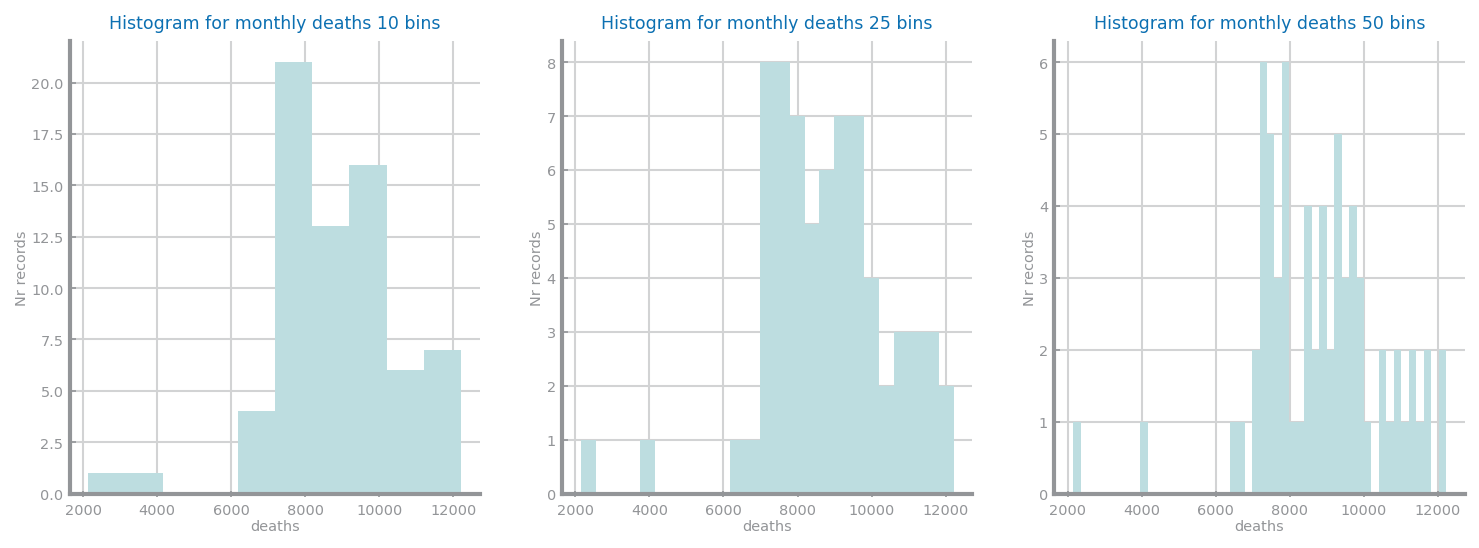

In [9]:
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for monthly deaths %d bins'%bins[j])
    axs[j].set_xlabel('deaths')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(month_df.values, bins=bins[j])
plt.show()

## Data Stationarity


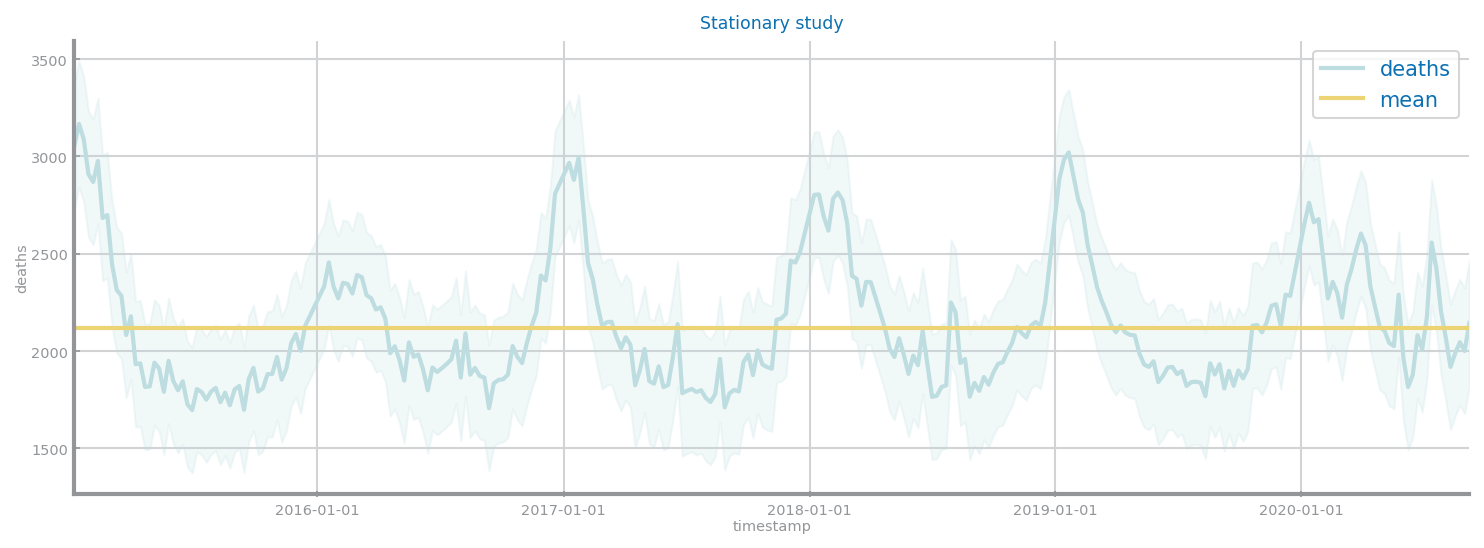

In [10]:
import numpy as np
dt_series = pd.Series(data['deaths'])

mean_line = pd.Series(np.ones(len(dt_series.values)) * dt_series.mean(), index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='timestamp', y_label='deaths', title='Stationary study', show_std=True)
plt.show()

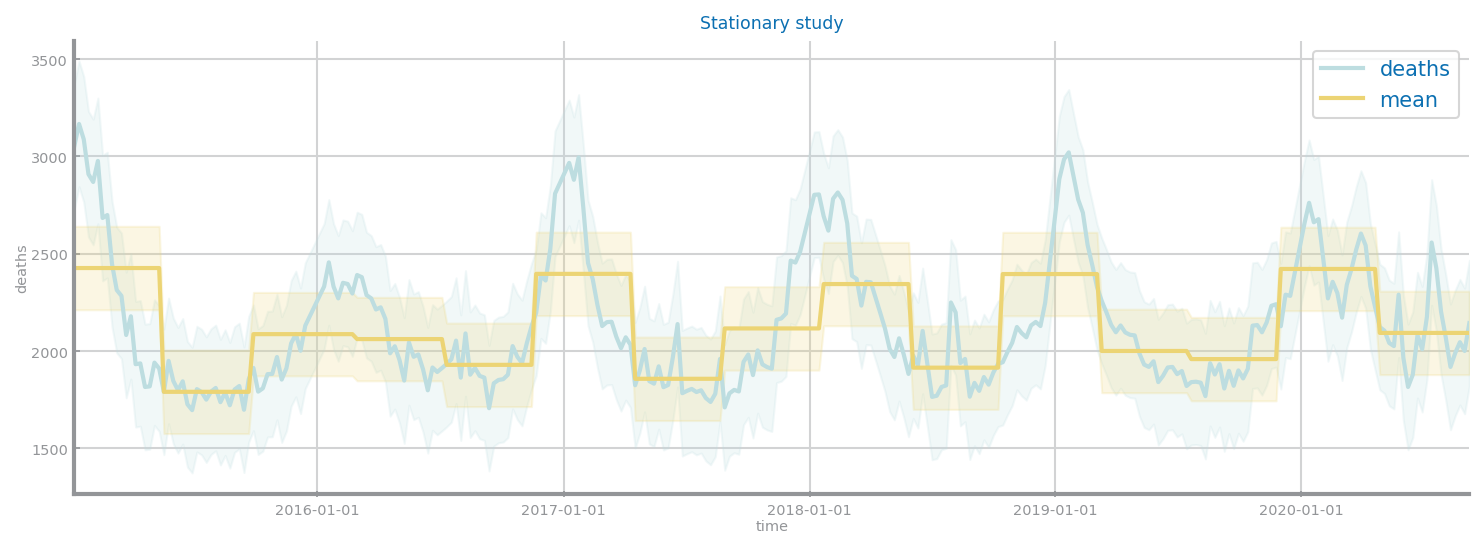

In [11]:
BINS = 15
line = []
n = len(dt_series)
for i in range(BINS):
    start = int(i*n/BINS)
    end = int((i+1)*n/BINS)
    b = dt_series[start:end]
    mean = [b.mean()] * (end - start)
    line += mean

line += [line[-1]] * (n - len(line))
mean_line = pd.Series(line, index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='time', y_label='deaths', title='Stationary study', show_std=True)
plt.show()

## Time series transformation

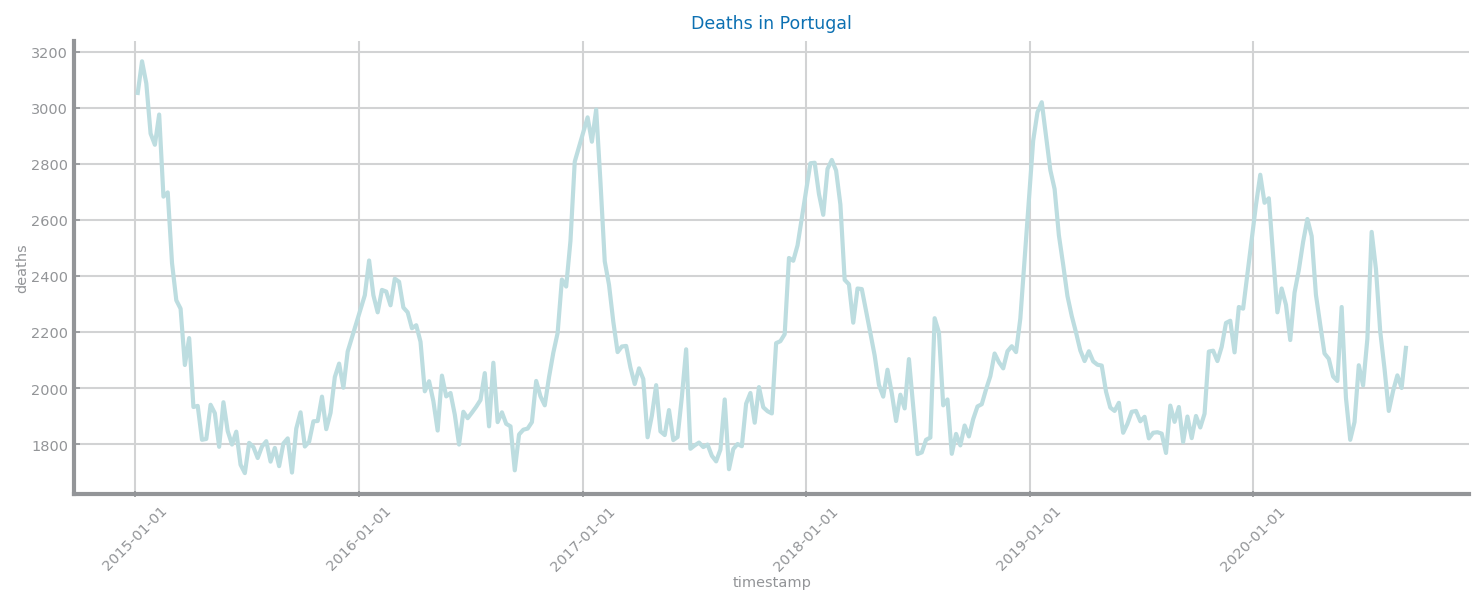

In [12]:
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data, x_label='timestamp', y_label='deaths', title='Deaths in Portugal')
plt.xticks(rotation = 45)
plt.show()

### Smoothing

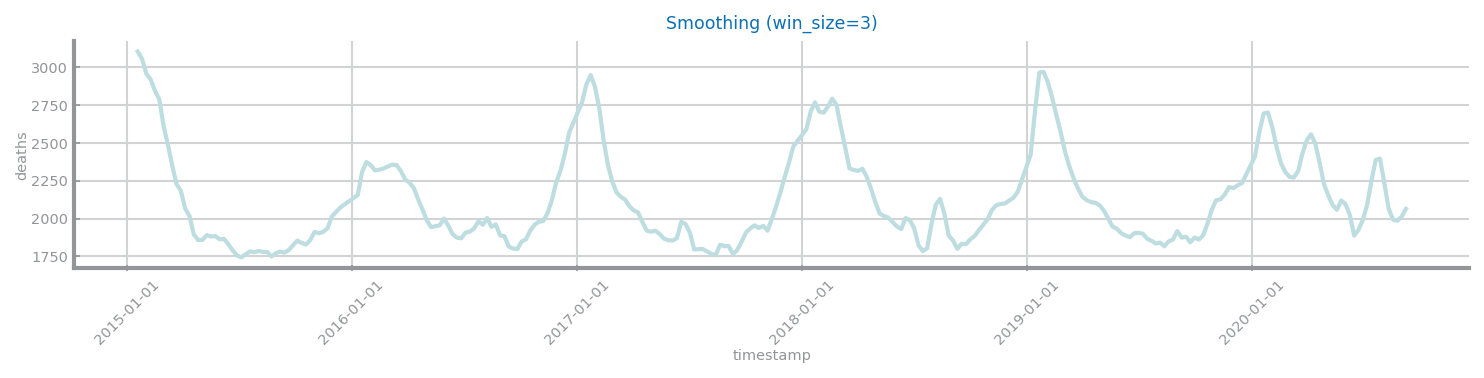

In [13]:
WIN_SIZE = 3
rolling = data.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

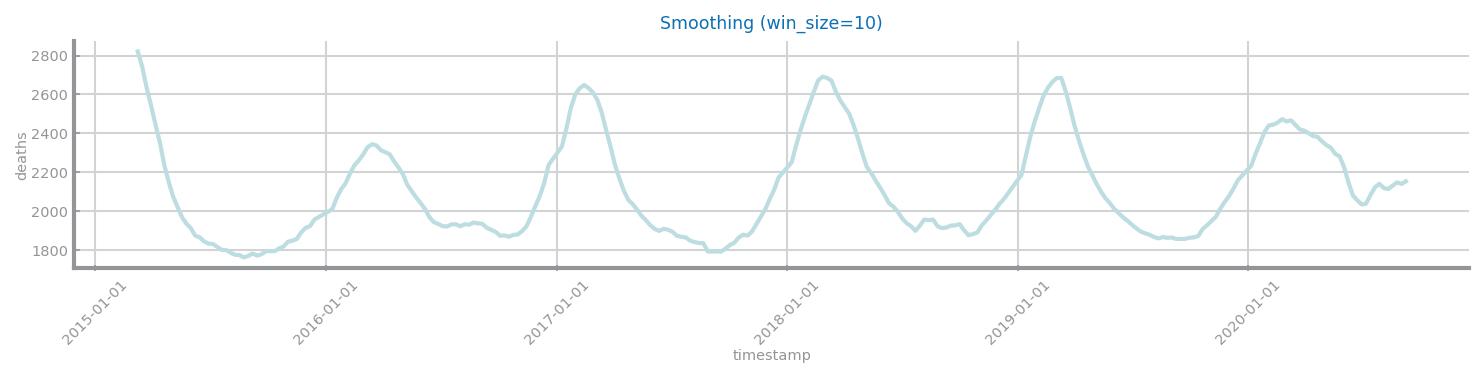

In [14]:
WIN_SIZE = 10
rolling = data.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

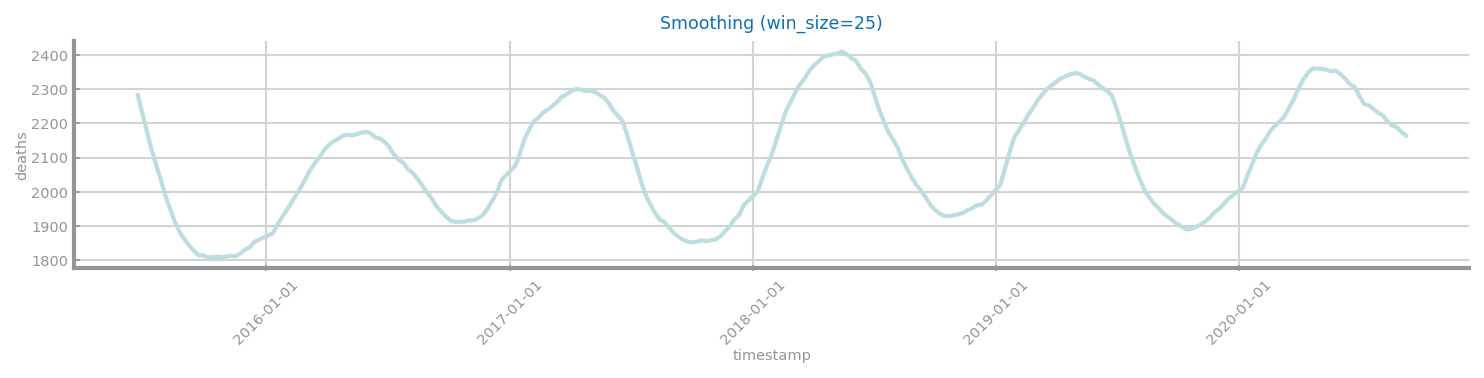

In [15]:
WIN_SIZE = 25
rolling = data.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

# FORECASTING

<Figure size 1800x300 with 0 Axes>

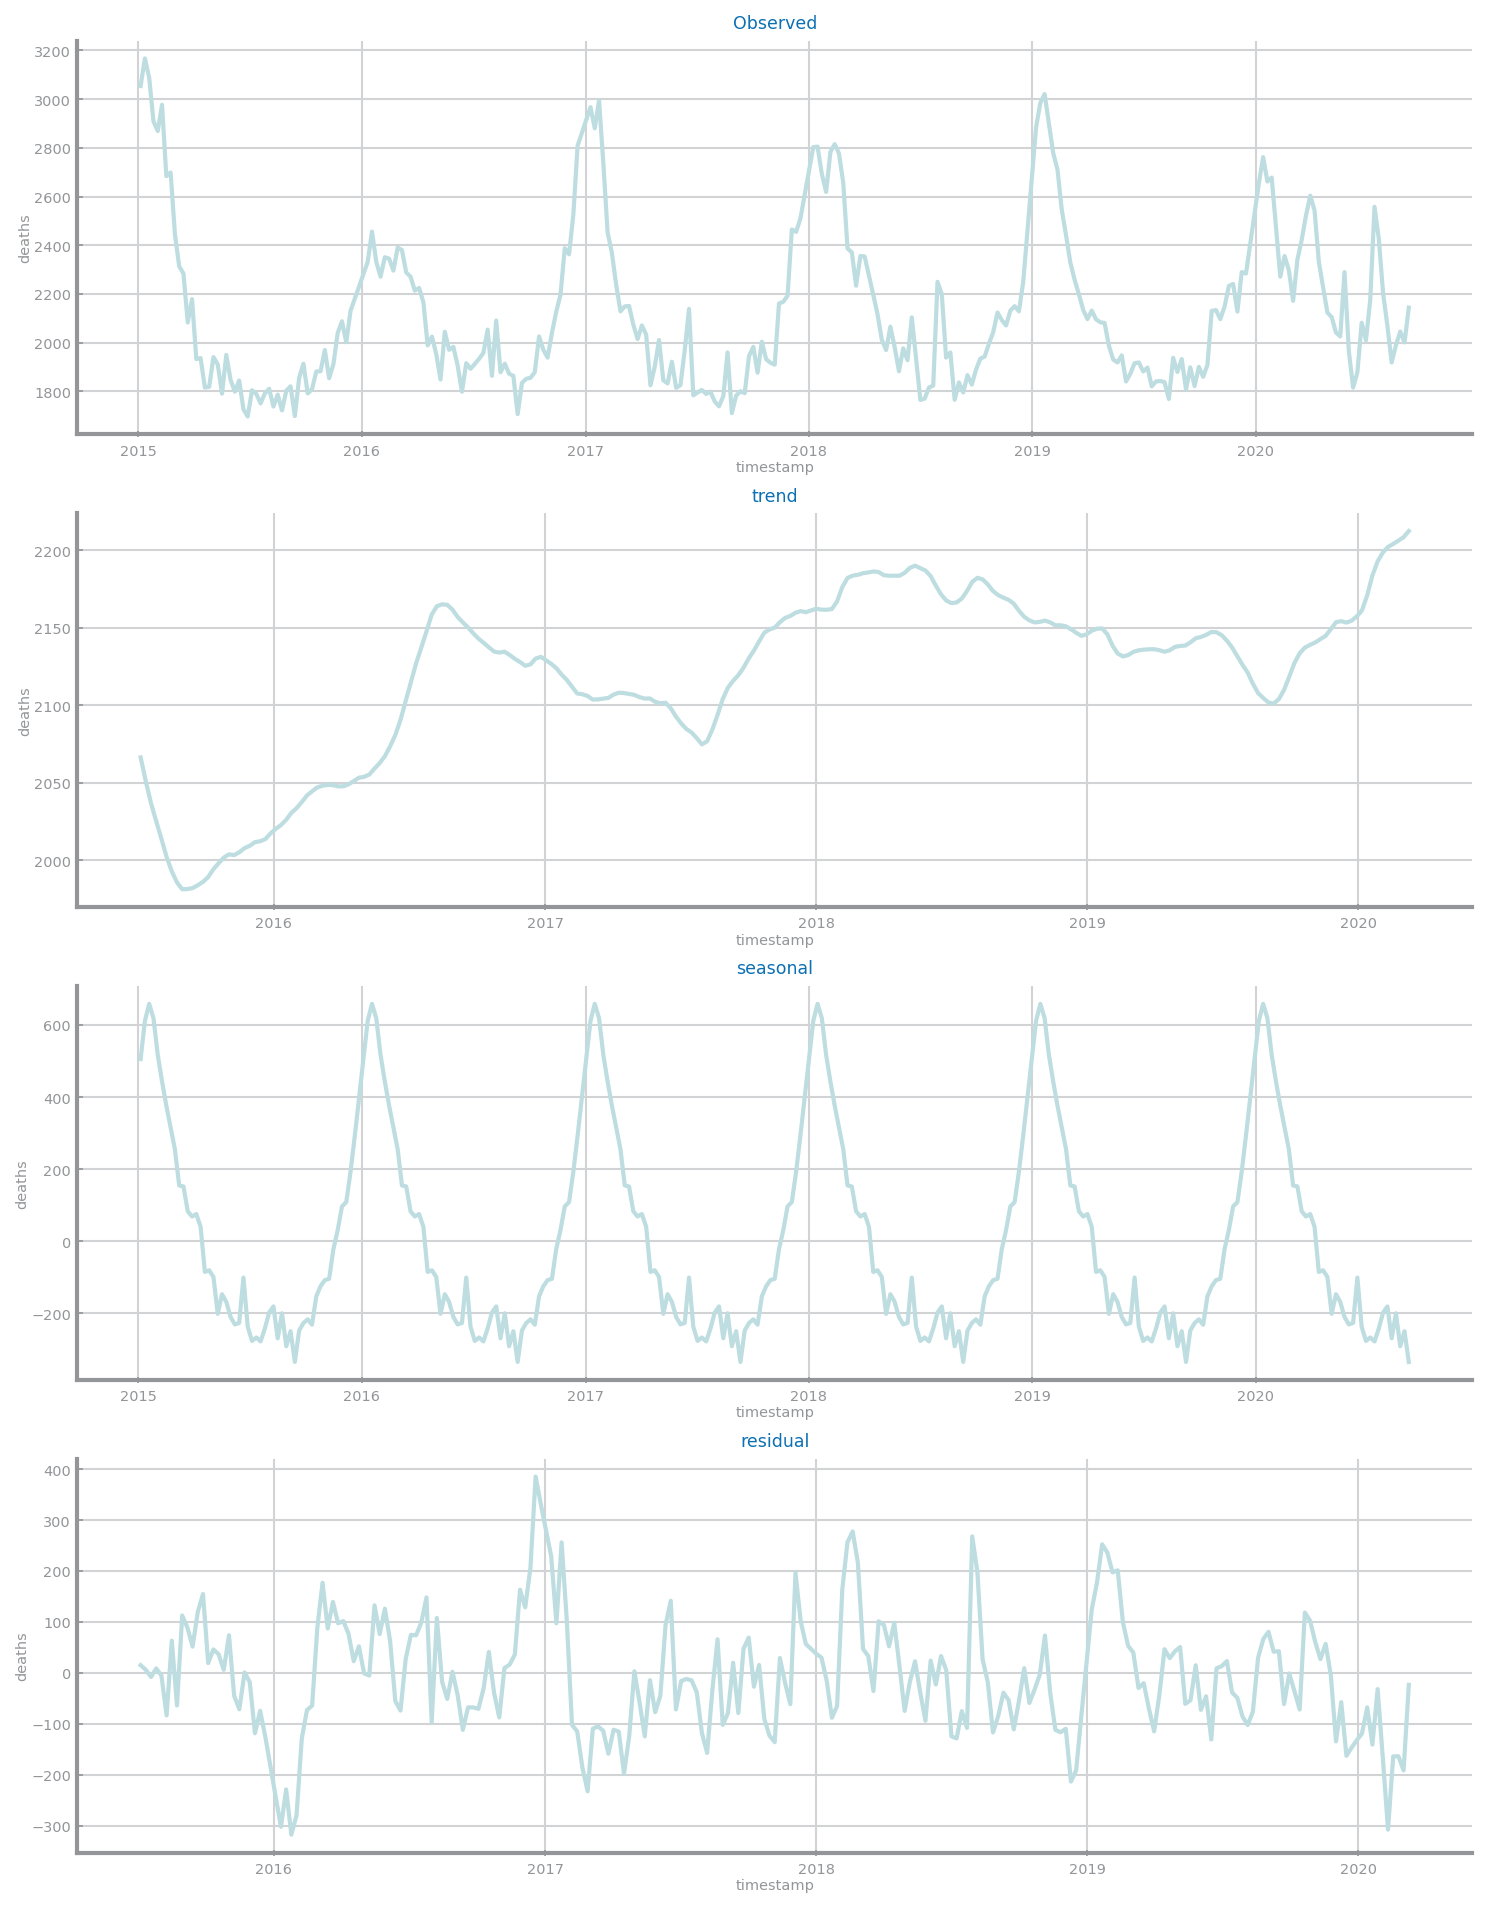

In [39]:
import statsmodels.tsa.seasonal as seasonal


data = pd.read_csv('deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)
data = data.sort_values('start_date')

data = data.asfreq("w-mon")
data = data.interpolate()

x_label='timestamp'
y_label='consumption'

FIG_WIDTH, FIG_HEIGHT = 3*ts.HEIGHT, ts.HEIGHT/2

def plot_components(series: pd.Series, comps: seasonal.DecomposeResult, x_label: str = 'time', y_label:str =''):
    lst = [('Observed', series), ('trend', comps.trend), ('seasonal', comps.seasonal), ('residual', comps.resid)]
    _, axs = plt.subplots(len(lst), 1, figsize=(3*ts.HEIGHT, ts.HEIGHT*len(lst)))
    for i in range(len(lst)):
        axs[i].set_title(lst[i][0])
        axs[i].set_ylabel(y_label)
        axs[i].set_xlabel(x_label)
        axs[i].plot(lst[i][1])
        
decomposition = seasonal.seasonal_decompose(data, model = "add")
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_components(data, decomposition, x_label='timestamp', y_label='deaths')
plt.show()

## ARIMA

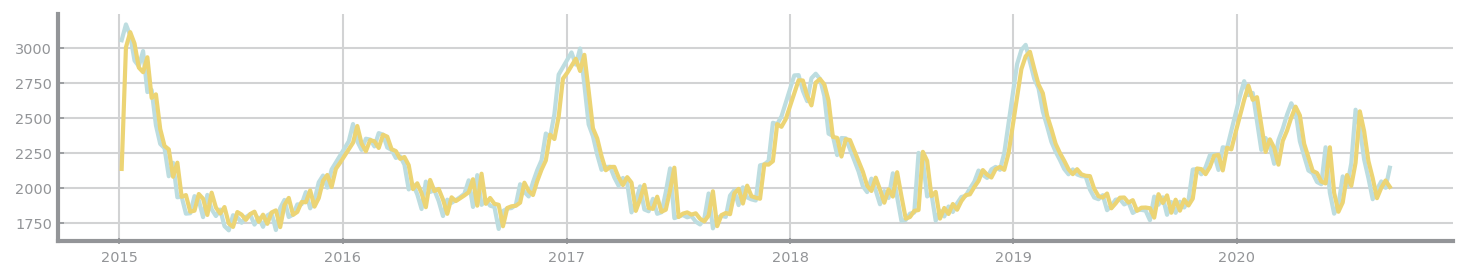

In [63]:
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = data
model = ARIMA(df, order=(1,0,1))
results = model.fit()
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(df)
plt.plot(results.fittedvalues)
plt.show()


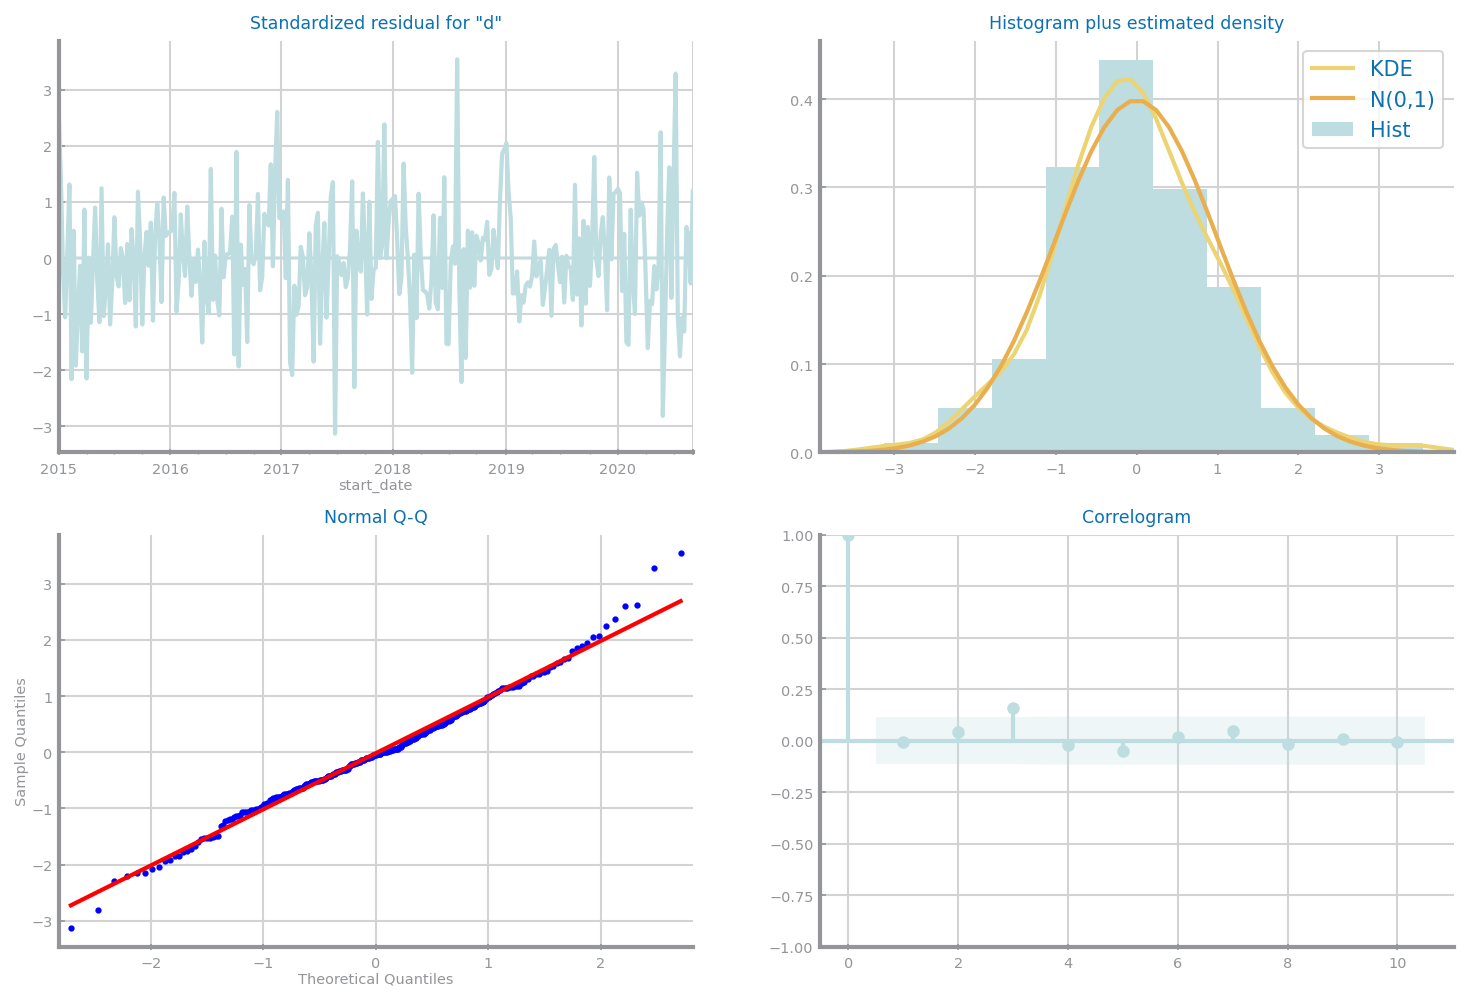

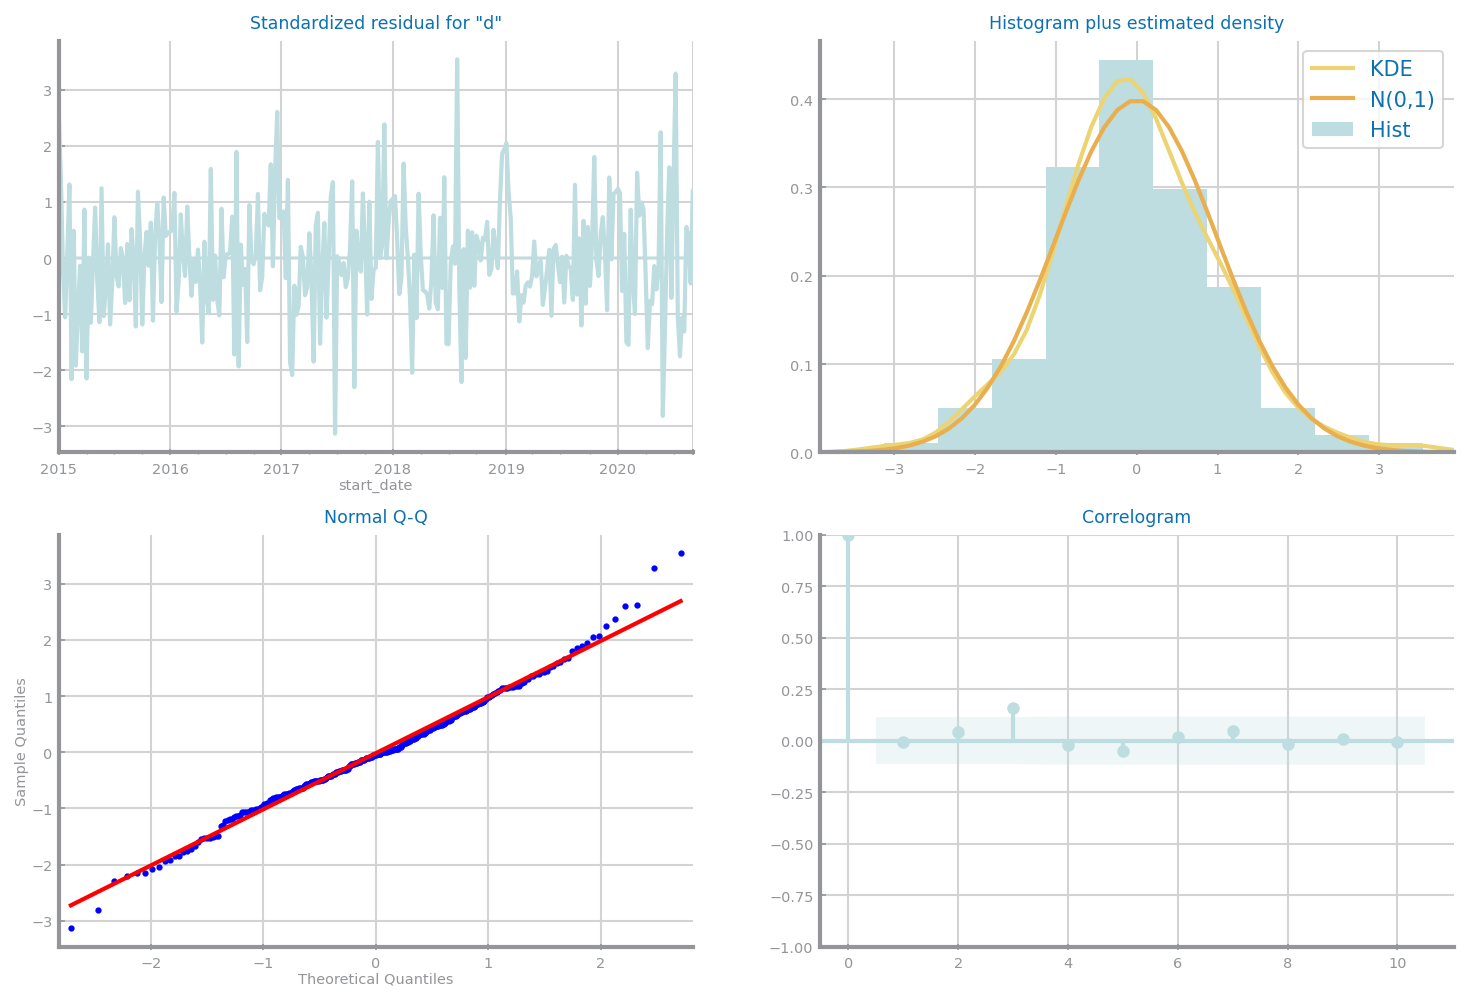

In [64]:
results.plot_diagnostics(figsize=(FIG_WIDTH, 4*FIG_HEIGHT))

            deaths
start_date        
2015-01-05  3054.0
2015-01-12  3167.0
2015-01-19  3088.0
2015-01-26  2909.0
2015-02-02  2869.0
...            ...
2020-08-10  1919.0
2020-08-17  1990.0
2020-08-24  2046.0
2020-08-31  2001.0
2020-09-07  2144.0

[297 rows x 1 columns]


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimiz

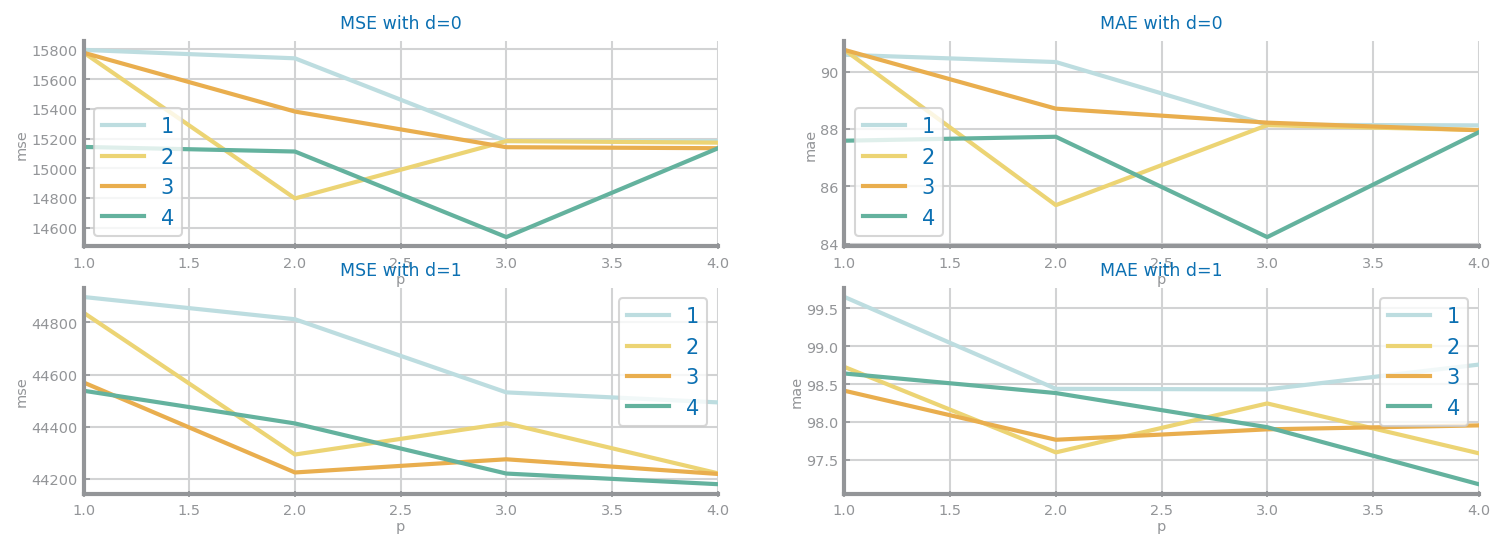

In [97]:
_, axs = plt.subplots(2, 2, figsize=(FIG_WIDTH, 2*FIG_HEIGHT))
params = (1, 2, 3, 4)
print(data)
for d in (0,1):
    mse = {}
    mae = {}
    for p in params:
        mse_lst = []
        mae_lst = []
        for q in params:
            mod = ARIMA(df, order=(p, d, q))
            results = mod.fit()
            mse_lst.append(results.mse)
            mae_lst.append(results.mae)
        mse[p] = mse_lst
        mae[p] = mae_lst
    ds.multiple_line_chart(params, mse, ax=axs[d, 0], title=f'MSE with d={d}', xlabel='p', ylabel='mse')
    ds.multiple_line_chart(params, mae, ax=axs[d, 1], title=f'MAE with d={d}', xlabel='p', ylabel='mae')
plt.show()

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


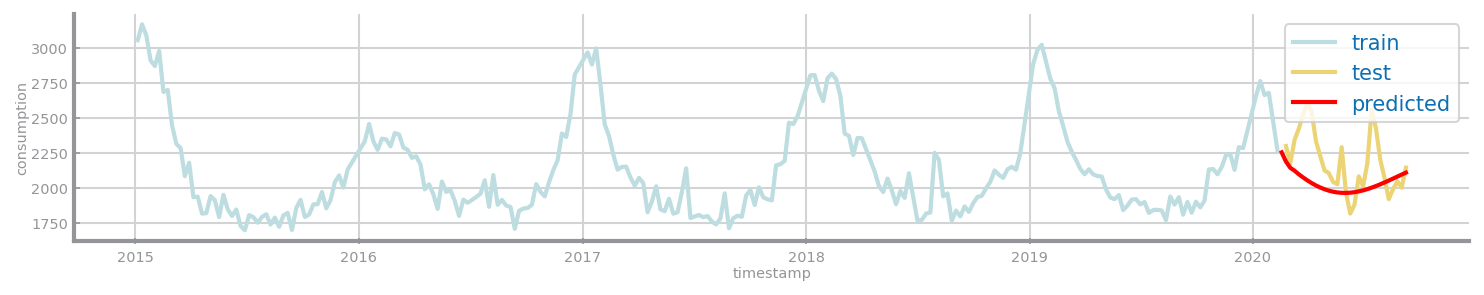

In [98]:
def plot_forecasting(train: pd.Series, test: pd.Series, pred,
                     ax: plt.Axes=None, x_label: str = 'time', y_label:str =''):
    if ax is None:
        ax = plt.gca()
    ax.plot(train, label='train')
    ax.plot(test, label='test')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pred.index, pred.values, label='predicted', color='r')
    plt.legend()

p, d, q = 3, 0, 4
n = len(df)
train = df[:n*9//10]
test = df[n*9//10+1:]

mod = ARIMA(train, order=(p, d, q))
mod = mod.fit()
pred = mod.predict(start = len(train), end = len(df)-1)

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
No handles with labels found to put in legend.
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
No handles with labels found to put in legend.


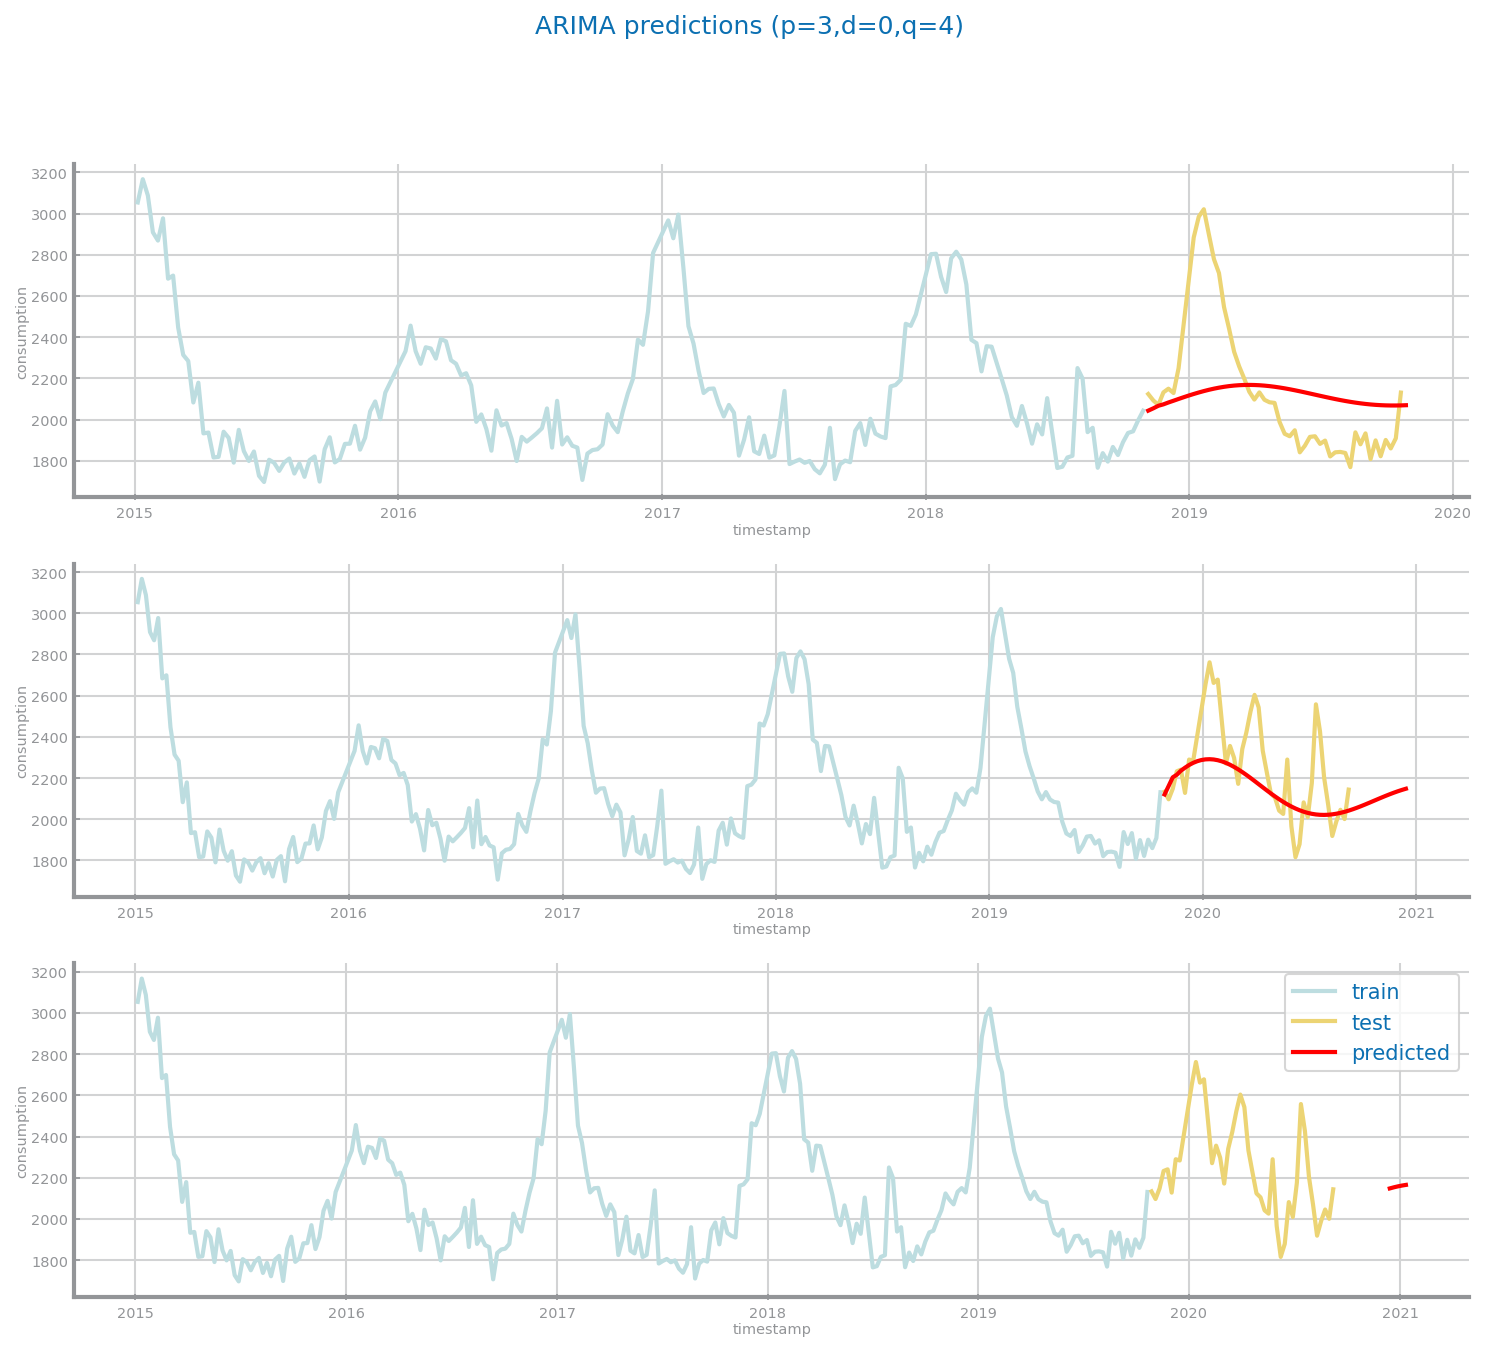

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
No handles with labels found to put in legend.
No handles with labels found to put in legend.


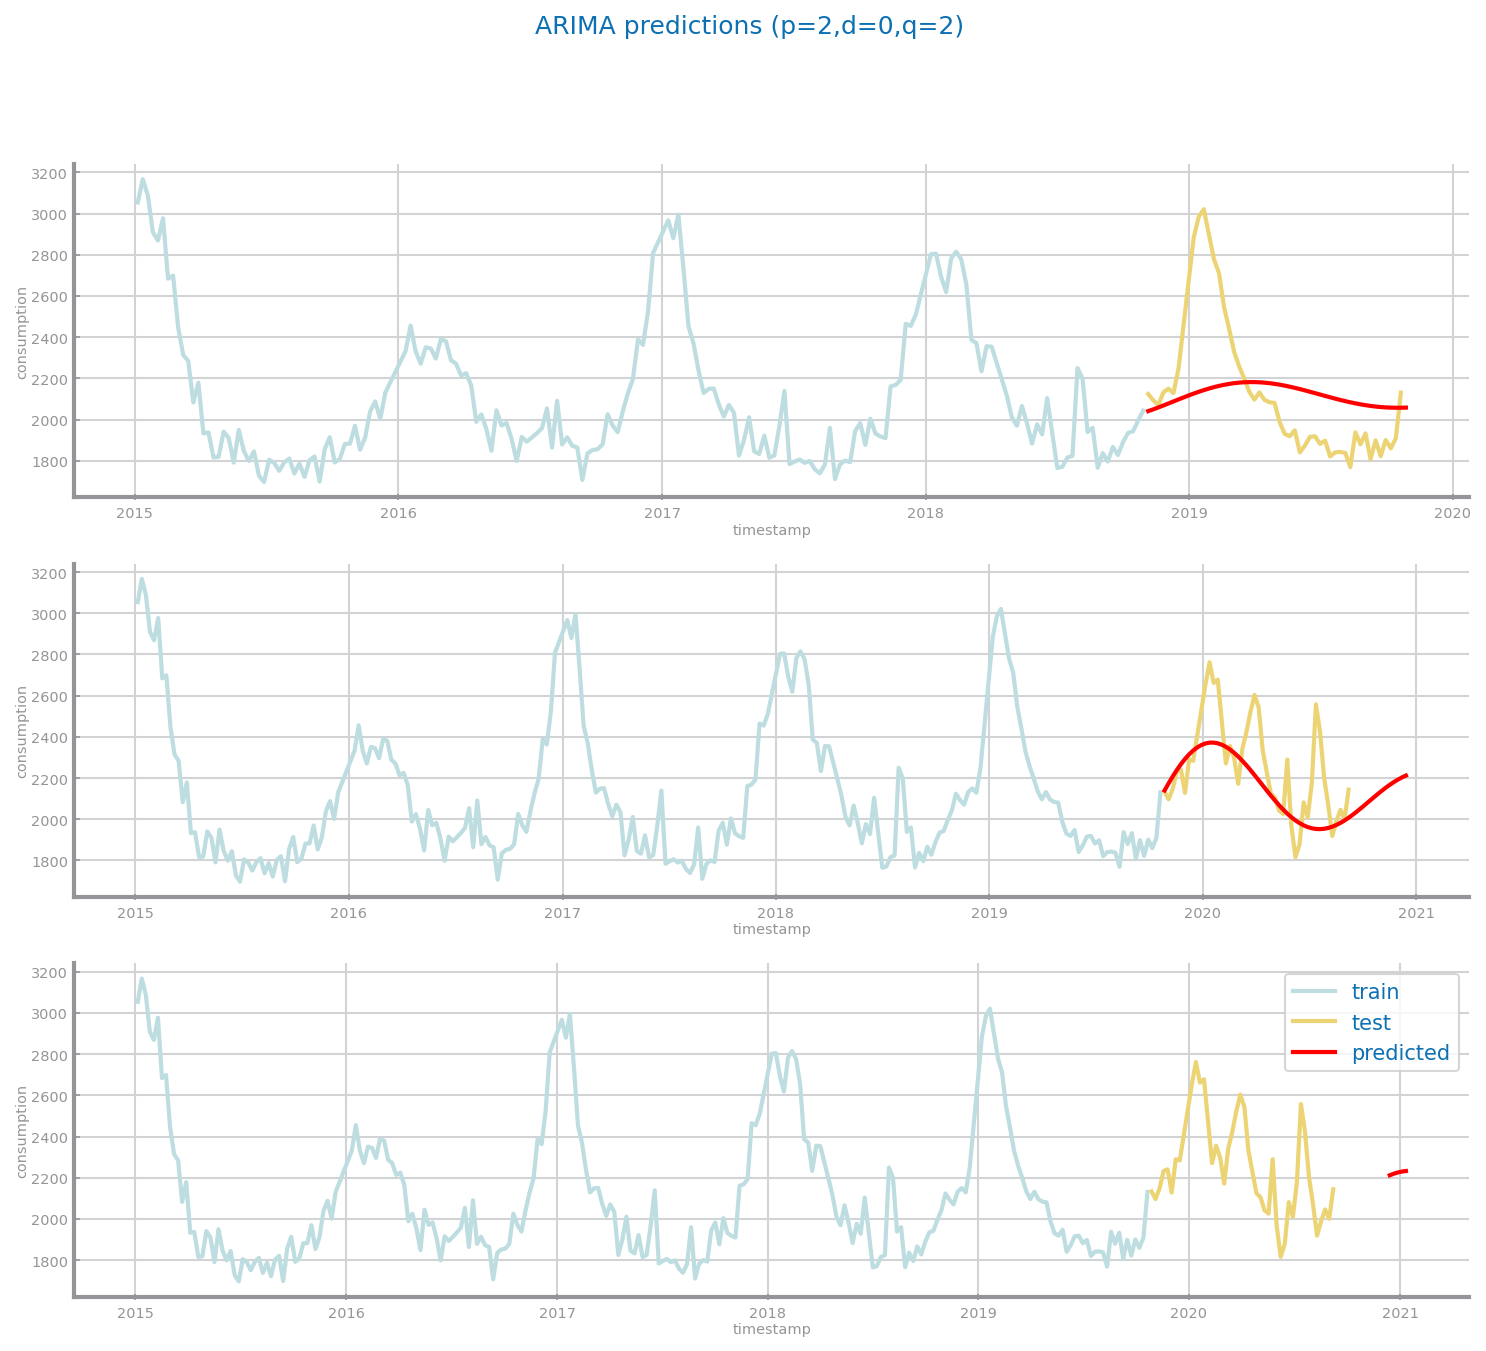

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
No handles with labels found to put in legend.
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
No handles with labels found to put in legend.


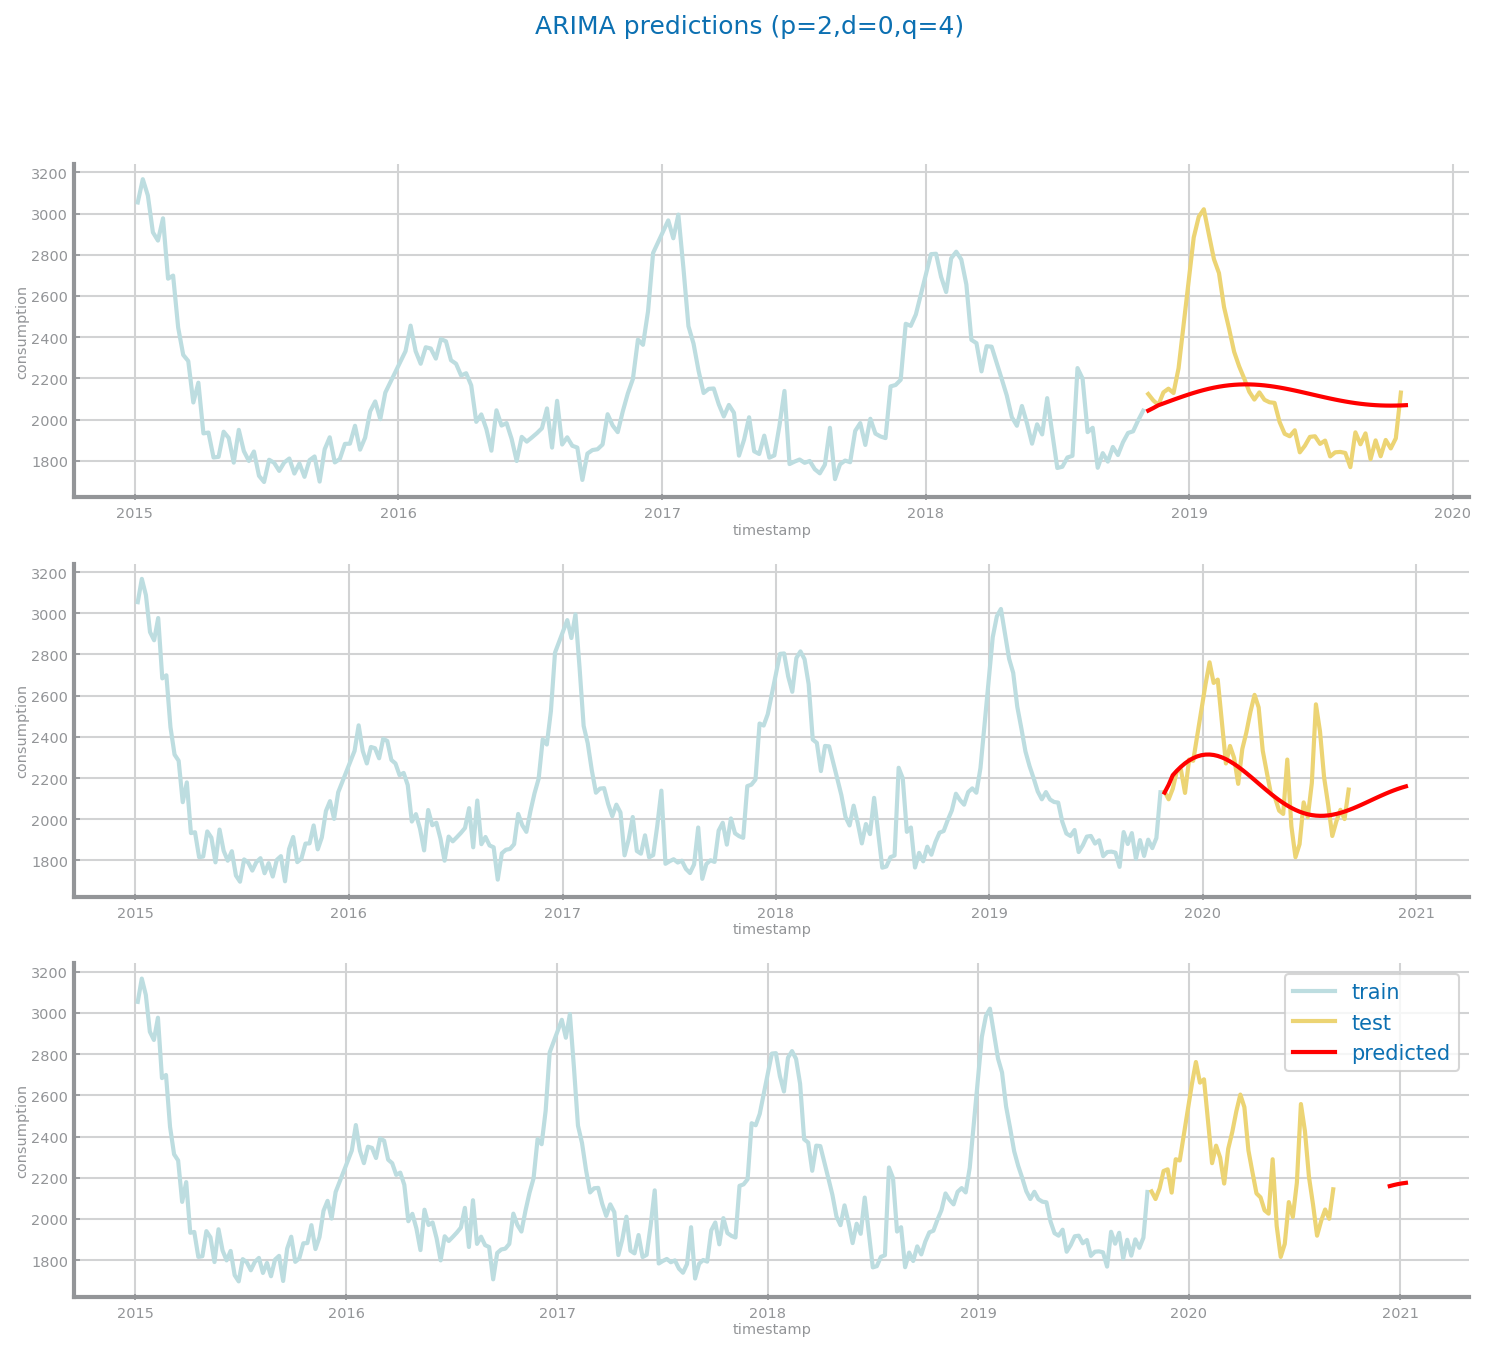

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
No handles with labels found to put in legend.
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
No handles with labels found to put in legend.


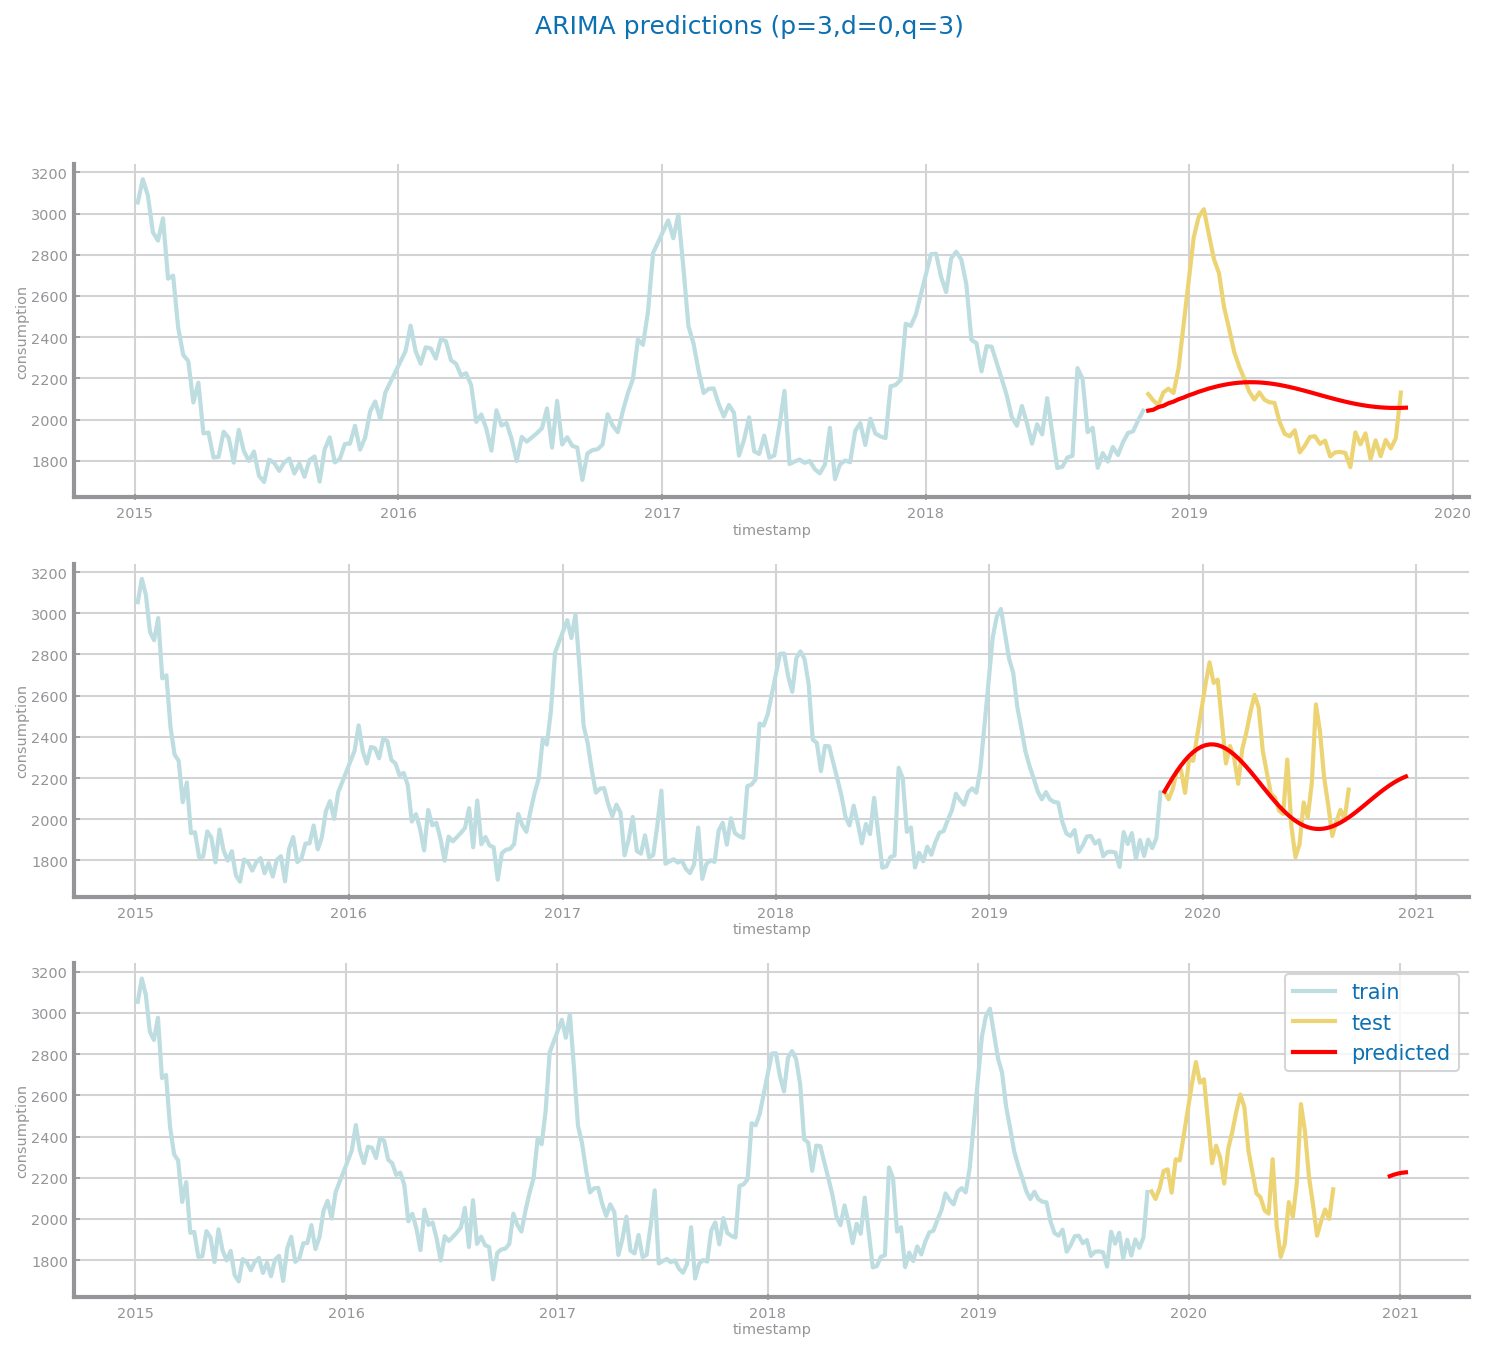

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
No handles with labels found to put in legend.
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
No handles with labels found to put in legend.


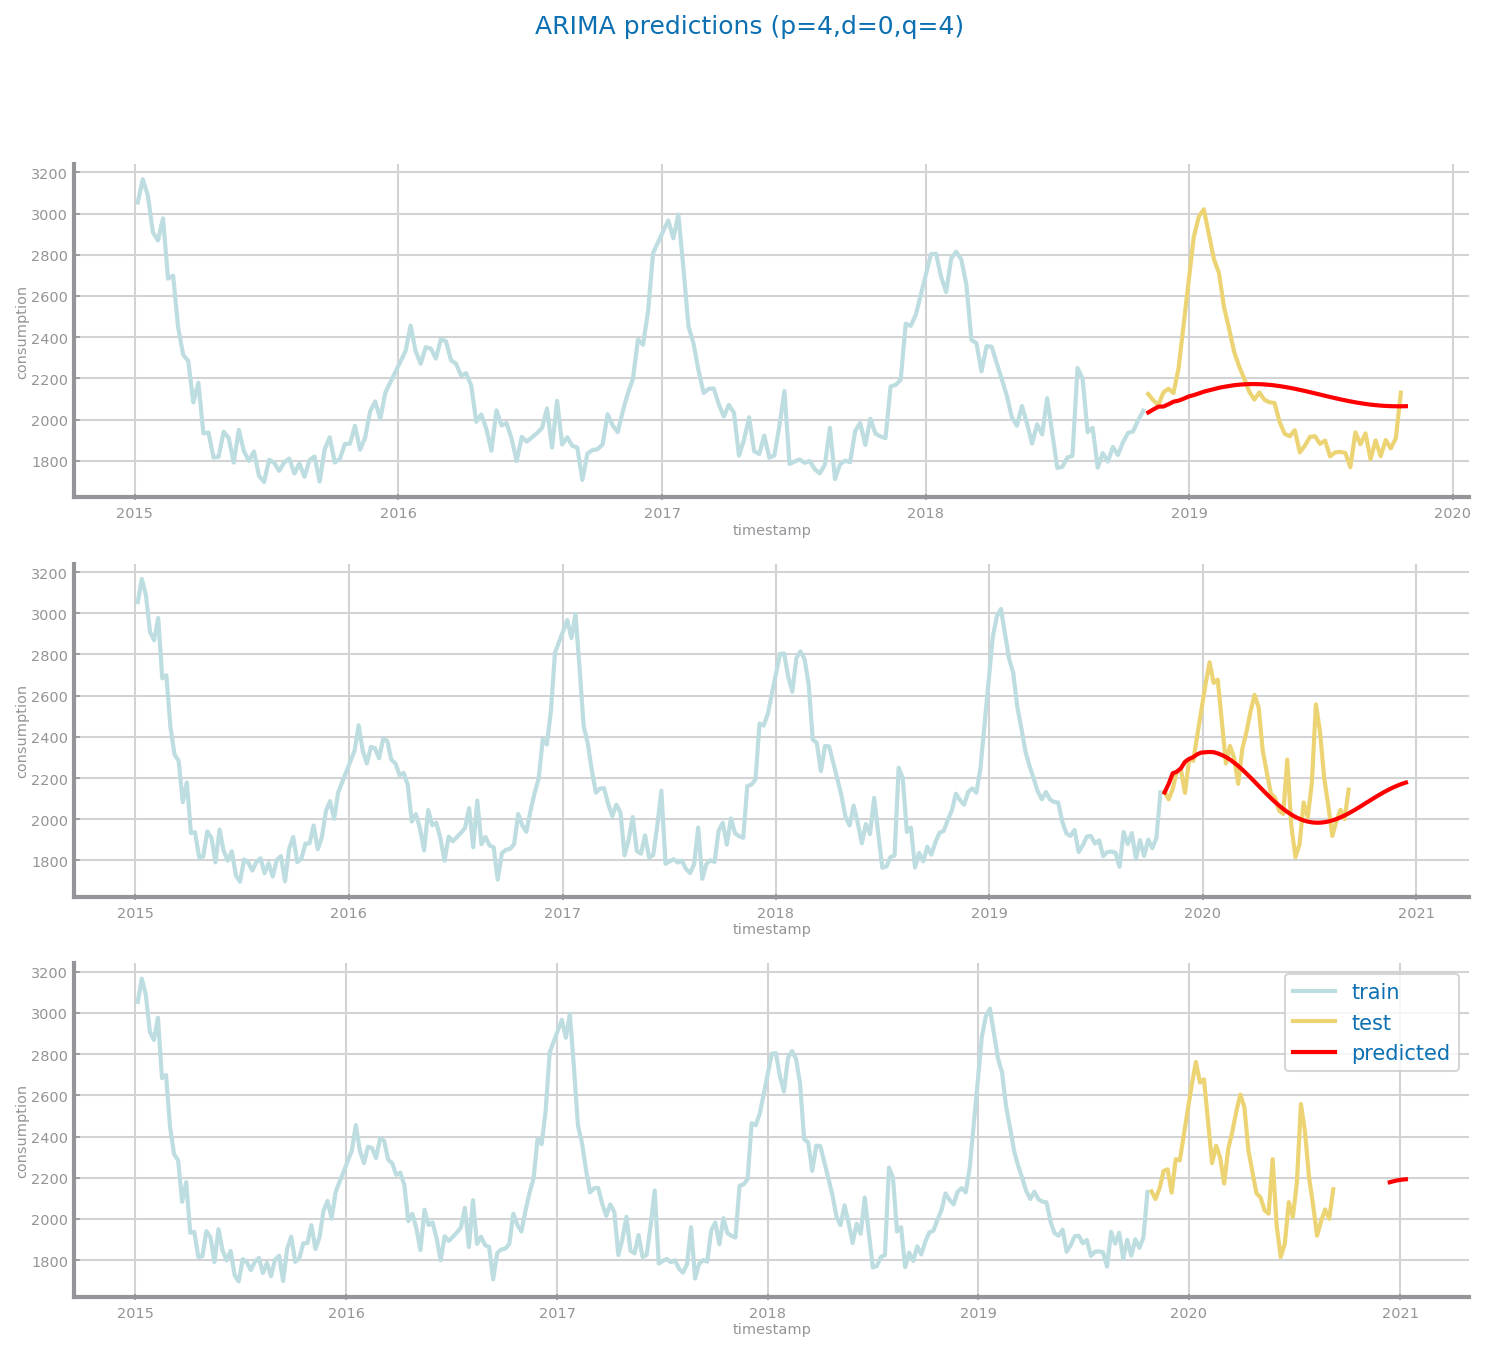

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
No handles with labels found to put in legend.
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
No handles with labels found to put in legend.


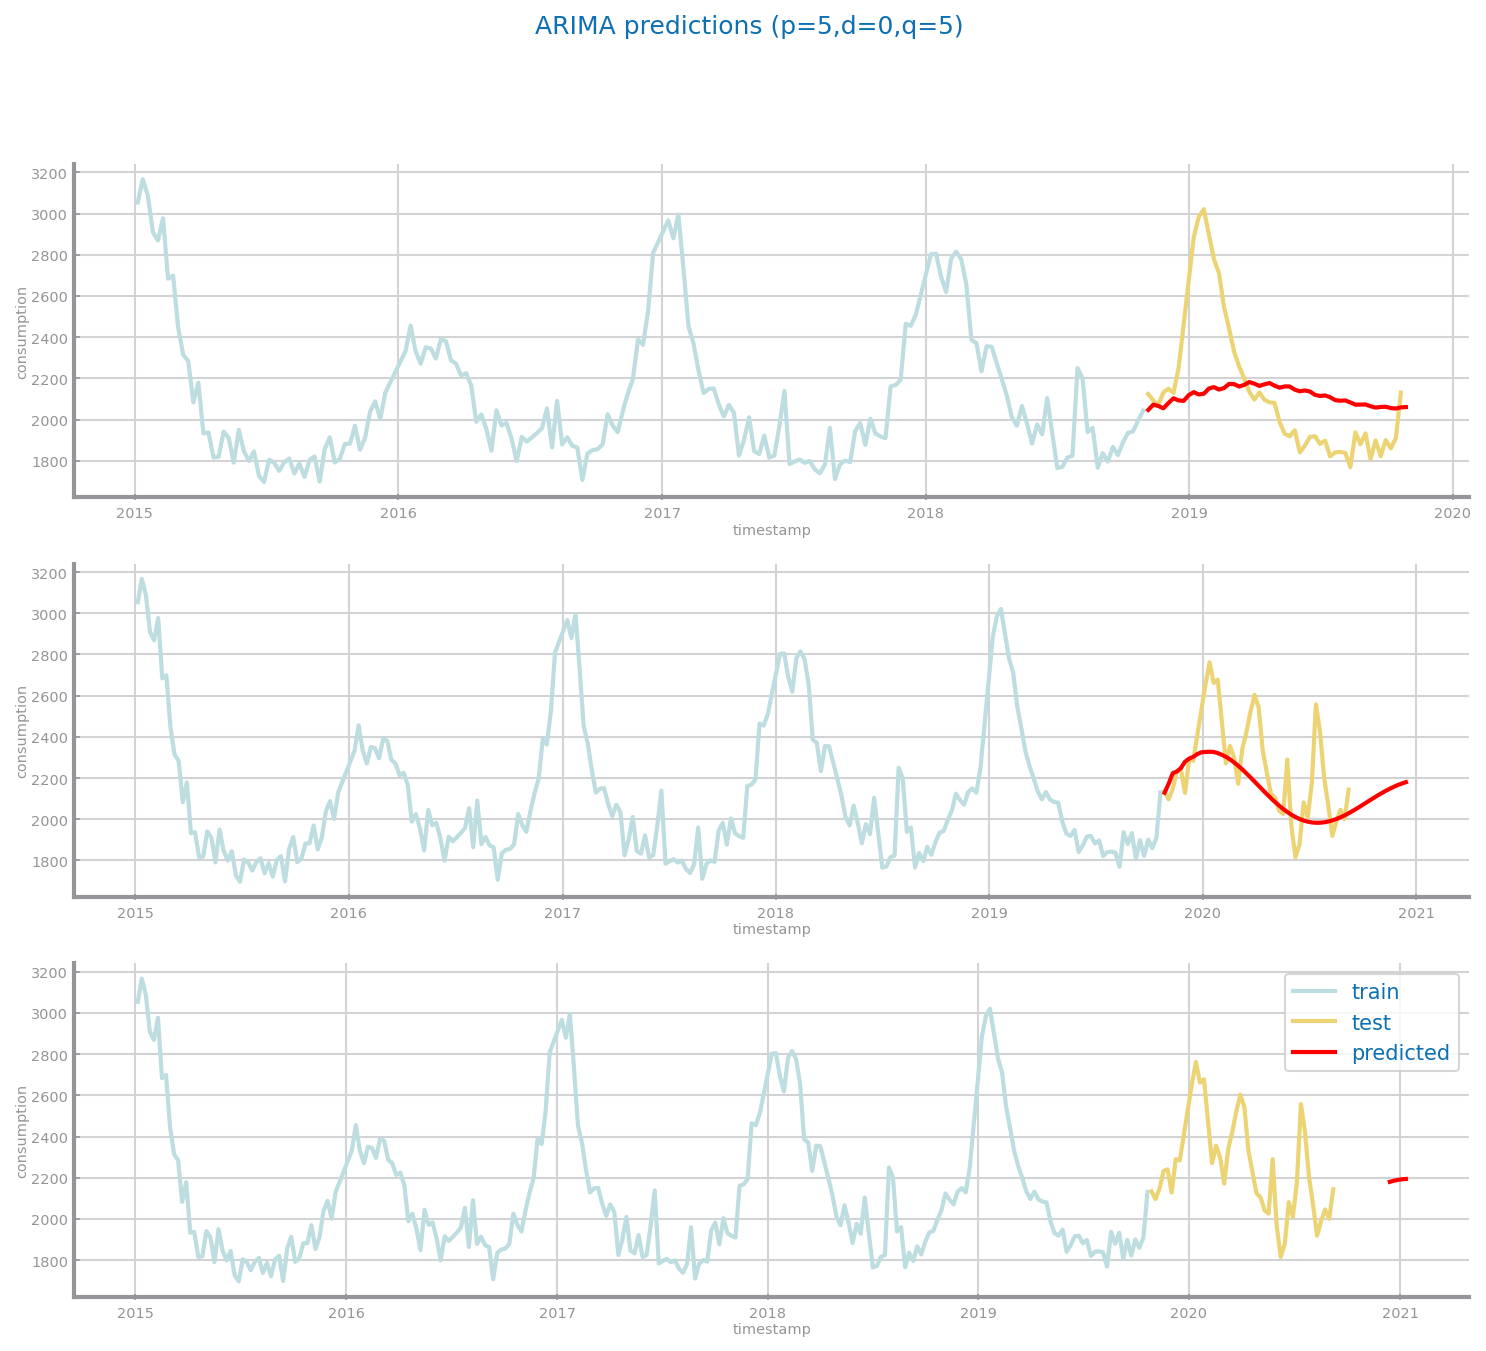

[15537.238979361151, 15721.558583980037, 15574.865784672382, 15674.685833551854, 15441.296778776623, 15518.007802579628]
[13903.20299700691, 14071.450338610028, 13895.182125363632, 14076.494107726527, 13862.163081391333, 13858.462900741311]


In [118]:
d=0
mse=[[],[]]
for p, q in ((3,4),(2,2),(2,4),(3,3),(4,4),(5,5)):
    fig, axs = plt.subplots(3, 1, figsize=(FIG_WIDTH, 5*FIG_HEIGHT))
    fig.suptitle(f'ARIMA predictions (p={p},d={d},q={q})')
    k = 0

    for i,j,m in ((200, 251, 251),(251,len(df),len(df)+13)):
        train = df[:i]
        test = df[i:j]

        mod = ARIMA(train, order=(p, d, q))
        mod = mod.fit()
        if i == 200:
            mse[0].append(mod.mse)
        else: mse[1].append(mod.mse)
        pred = mod.predict(start = len(train), end = m)
        plot_forecasting(train, test, pred, ax=axs[k], x_label=x_label, y_label=y_label)
        k += 1
      
    pred = mod.predict(start = len(df)+13, end = len(df)+17)
    plot_forecasting(train, test, pred, ax=axs[k], x_label=x_label, y_label=y_label)
    plt.show()
    
print(mse[0])
print(mse[1])